In [1]:
#Load Libraries

import pandas as pd
from matplotlib import pyplot
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot

from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame



In [2]:
# Load Data
globalHoneyCorr = pd.read_csv("../Data/usdaGlobal_HighCorr_Honey.csv")

globalHoneyCorr.head(50)

,Commodity_Description,Year,Value,Country_Code,Country_Name,Attribute_Description,Unit_Description
0,"Almonds, Shelled Basis",1998,235884,US,United States,Production,(MT)
1,"Almonds, Shelled Basis",1999,377800,US,United States,Production,(MT)
2,"Almonds, Shelled Basis",2000,318900,US,United States,Production,(MT)
3,"Almonds, Shelled Basis",2001,376500,US,United States,Production,(MT)
4,"Almonds, Shelled Basis",2002,494416,US,United States,Production,(MT)
5,"Almonds, Shelled Basis",2003,471740,US,United States,Production,(MT)
6,"Almonds, Shelled Basis",2004,462664,US,United States,Production,(MT)
7,"Almonds, Shelled Basis",2005,415040,US,United States,Production,(MT)
8,"Almonds, Shelled Basis",2006,508023,US,United States,Production,(MT)
9,"Almonds, Shelled Basis",2007,630500,US,United States,Production,(MT)


In [3]:
# Picking highly correlated commodity in grains  - Barley, Oats.

Barley_DS = globalHoneyCorr[globalHoneyCorr.Commodity_Description == 'Barley']

Oats_DS = globalHoneyCorr[globalHoneyCorr.Commodity_Description == 'Oats']


In [4]:
# Subsetting the Datasets to have year and production value

Barley_DS1 = Barley_DS[["Year", "Value"]]

Oats_DS1 = Oats_DS[["Year", "Value"]]

Barley_DS1 = pd.DataFrame(data=Barley_DS1)
Oats_DS1 = pd.DataFrame(data=Oats_DS1)



In [5]:
# Renaming the column Value

Barley_DS1.rename(columns = {'Value':'BarleyProd'}, inplace = True)

Oats_DS1.rename(columns = {'Value':'OatsProd'}, inplace = True)



# Working on Barley 

In [6]:
# Saving the dataset as CSV file for future use


Barley_DS1.to_csv(r'../Data/BarleyArima.csv', index = False)


In [7]:
# Reformat the Year as Date and extracting only the year out of it.

Barley_DS2 = pd.DataFrame(data=Barley_DS1)


Barley_DS2['Year'] = Barley_DS2['Year'].astype(str)
Barley_DS2['Year'] = Barley_DS2['Year'].apply(lambda s: s+"-01-01")
Barley_DS2['Year'] = pd.to_datetime(Barley_DS2.Year)
Barley_DS2['Year'] = Barley_DS2['Year'].dt.year

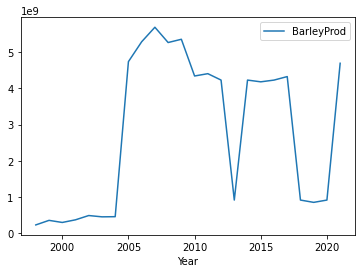

In [8]:

Barley_DS3 = pd.DataFrame(data=Barley_DS1)



Barley_DS2.set_index('Year', inplace=True)



Barley_DS2.plot()
pyplot.show()




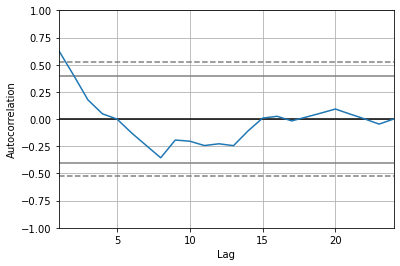

{'adf': -1.2406416518278522,
 'pvalue': 0.6558730436045354,
 'usedlag': 9,
 'nobs': 14,
 'criticalvalues': {'1%': -4.01203360058309,
  '5%': -3.1041838775510207,
  '10%': -2.6909873469387753},
 'icbest': 634.0830837319835}

In [12]:
# As we can clearly see, there is no trend in time and that suggests that the data are stationary.
# However just to be sure we will use an Augmented Dickey-Fuller test.

autocorrelation_plot(Barley_DS2)
pyplot.show()

result = adfuller(Barley_DS2['BarleyProd'], autolag = 'AIC')

#to help you, we added the names of every value

dict(zip(['adf', 'pvalue', 'usedlag', 'nobs', 'critical' 'values', 'icbest'],result))


In [ ]:
# Analysing the results

# Test statistic: -1.24
# P-value: 0.65
    
# We failed to reject the Null Hypothesis and the series has a unit root thus is not stationary.
# In other words, it has some time-dependent structure and does not have constant variance over time.

<AxesSubplot:xlabel='Year'>

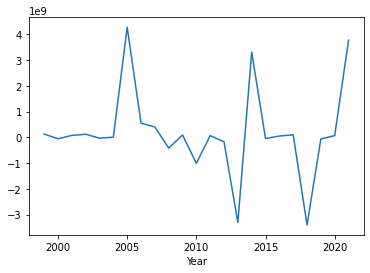

In [14]:
Barley_DS2['1difference']=Barley_DS2['BarleyProd']-Barley_DS2['BarleyProd'].shift(1)
Barley_DS2['1difference'].plot()

In [17]:
# Barley_DS2.dropna()

result = adfuller(Barley_DS2['1difference'].dropna(), autolag = 'AIC')

#to help you, we added the names of every value

#dict(zip(['adf', 'pvalue', 'usedlag', 'nobs', 'critical' 'values', 'icbest'],result))

result

(-0.9714583338721993,
 0.763531382981293,
 8,
 14,
 {'1%': -4.01203360058309,
  '5%': -3.1041838775510207,
  '10%': -2.6909873469387753},
 594.3682191666715)

<AxesSubplot:xlabel='Year'>

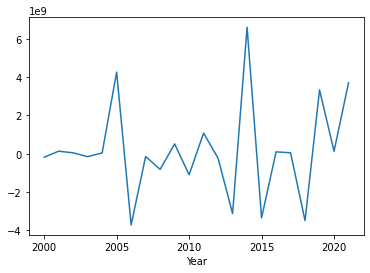

In [18]:
Barley_DS2['2difference']=Barley_DS2['1difference']-Barley_DS2['1difference'].shift(1)
Barley_DS2['2difference'].plot()

In [20]:
result = adfuller(Barley_DS2['2difference'].dropna(), autolag = 'AIC')
result



(-1.8892995548622382,
 0.3371115603404965,
 8,
 13,
 {'1%': -4.068853732362312,
  '5%': -3.1271488757396453,
  '10%': -2.7017297633136095},
 547.0152818883897)

<AxesSubplot:xlabel='Year'>

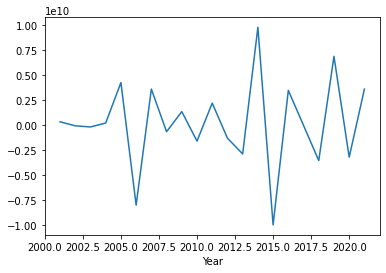

In [21]:
Barley_DS2['3difference']=Barley_DS2['2difference']-Barley_DS2['2difference'].shift(1)
Barley_DS2['3difference'].plot()

In [22]:
result = adfuller(Barley_DS2['3difference'].dropna(), autolag = 'AIC')
result



(-1.9250639731319283,
 0.32036363003439494,
 8,
 12,
 {'1%': -4.137829282407408,
  '5%': -3.1549724074074077,
  '10%': -2.7144769444444443},
 551.7131422128583)

                               SARIMAX Results                                
Dep. Variable:             BarleyProd   No. Observations:                   24
Model:                ARIMA(10, 1, 0)   Log Likelihood                -514.923
Date:                Thu, 14 Jul 2022   AIC                           1051.846
Time:                        17:39:24   BIC                           1064.336
Sample:                             0   HQIC                          1054.987
                                 - 24                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0791      0.343      0.231      0.818      -0.593       0.752
ar.L2          0.0482      0.310      0.155      0.876      -0.560       0.656
ar.L3         -0.0881      0.273     -0.323      0.7

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


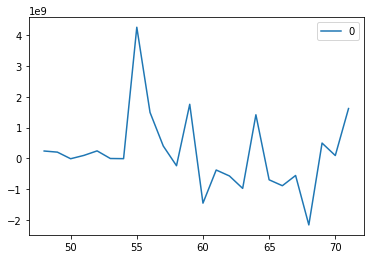

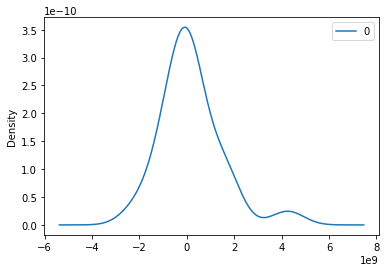

                  0
count  2.400000e+01
mean   1.790127e+08
std    1.281083e+09
min   -2.165564e+09
25%   -5.631681e+08
50%    4.091046e+07
75%    4.225787e+08
max    4.258000e+09


In [104]:
# fit model
model = ARIMA(Barley_DS2['BarleyProd'], order=(10,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

Year
1998-01-01    235884000
1999-01-01    361362000
2000-01-01    303700000
2001-01-01    376488000
2002-01-01    494416000
Name: BarleyProd, dtype: int64


/var/folders/w0/t7zkm9d12h11l_wy7wwcclsm0000gn/T/ipykernel_5768/2618002294.py:4: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('/Users/nehag/Desktop/Final Project/Data/BarleyArima1.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


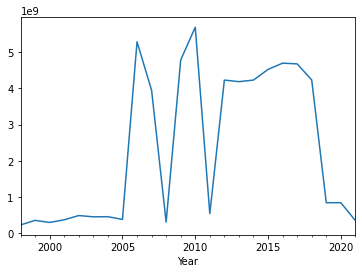

In [62]:
 
def parser(x):
	return datetime.strptime('01-01-'+x, '%d-%m-%Y')
 
series = read_csv('/Users/nehag/Desktop/Final Project/Data/BarleyArima1.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()



In [68]:
print(series.head())

Barley_DS2 = pd.DataFrame(data=series)




Year
1998-01-01    235884000
1999-01-01    361362000
2000-01-01    303700000
2001-01-01    376488000
2002-01-01    494416000
Name: BarleyProd, dtype: int64


In [66]:

#Barley_DS2['Year'] = pd.to_datetime(Barley_DS2.Year)


Barley_DS2['Year'] = Barley_DS2['Year'].dt.Year
print (Barley_DS2)

KeyError: 'Year'

In [ ]:

Barley_DS1['Year'] = pd.to_datetime(Barley_DS1['Year'], format = '%Y')
Barley_DS1['Year'] = (Barley_DS1['Year']).year
Barley_DS1.info()




date_string = "201512"
date_object = datetime.datetime.strptime(date_string, "%Y%m")
print(date_object)
print(date_object.year)

In [22]:


df = pd.read_csv("/Users/nehag/Desktop/Final Project/Data/usdaGlobal_HighCorr_Honey.csv")

 
def parser(x):
	return datetime.strptime(x, '%Y')
 
series = read_csv('/Users/nehag/Desktop/Final Project/Data/usdaGlobal_HighCorr_Honey.csv', header=0, parse_dates=[1], index_col=0, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

                             Year   Value Country_Code   Country_Name  \
Commodity_Description                                                   
Almonds, Shelled Basis 1998-01-01  235884           US  United States   
Almonds, Shelled Basis 1999-01-01  377800           US  United States   
Almonds, Shelled Basis 2000-01-01  318900           US  United States   
Almonds, Shelled Basis 2001-01-01  376500           US  United States   
Almonds, Shelled Basis 2002-01-01  494416           US  United States   

                       Attribute_Description Unit_Description  
Commodity_Description                                          
Almonds, Shelled Basis            Production             (MT)  
Almonds, Shelled Basis            Production             (MT)  
Almonds, Shelled Basis            Production             (MT)  
Almonds, Shelled Basis            Production             (MT)  
Almonds, Shelled Basis            Production             (MT)  


OverflowError: int too big to convert

In [19]:

#We need to set the Month column as index and convert it into datetime
df.set_index('Year',inplace=True)

df.index = datetime.strptime(df[Year], '%Y')

df.head()


 
#We need to set the Month column as index and convert it into datetime
df.set_index(‘Month’,inplace=True)
df.index=pd.to_datetime(df.index)
df.head()

#dt = datetime.strptime(datestring, '%Y')

KeyError: "None of ['Year'] are in the columns"